<a href="https://colab.research.google.com/github/santhosharun99/IPL-data-visualisation/blob/main/IPL%20data%20visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
!pip install tabulate
!pip install pandas
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot



---------------------------------------------
This script analyzes data from deliveries.csv and matches.csv to plot the number of wickets lost by each team during the powerplay overs in the 2023 season.

Steps:
1. Load deliveries and matches data.
2. Extract the start year from the 'season' column in matches data.
3. Filter matches data for the 2023 season.
4. Merge deliveries and matches data on match_id for the 2023 season matches.
5. Filter data for powerplay overs (first 6 overs).
6. Group data by batting team and count the wickets lost.
7. Plot the wickets lost in powerplay by each team.


In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

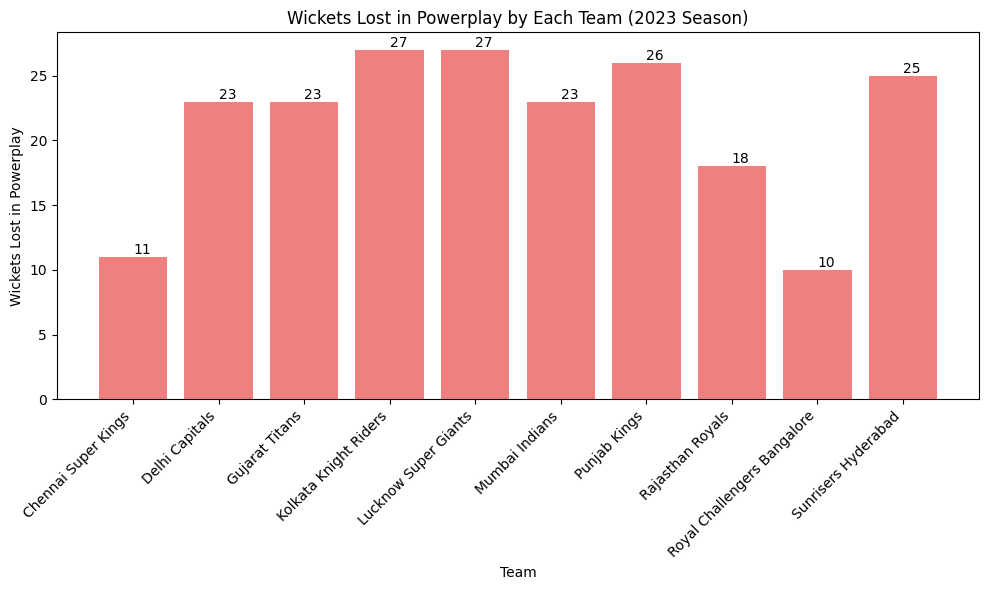

In [169]:
deliveries_df = pd.read_csv('/content/deliveries.csv')
matches_df = pd.read_csv('/content/matches.csv')
matches_df['start_year'] = matches_df['season'].str.split('/').str[0]
matches_df['start_year'] = matches_df['start_year'].astype(int)

matches_2023_df = matches_df[matches_df['start_year'] == 2023]
merged_df = pd.merge(deliveries_df, matches_2023_df, left_on='match_id', right_on='id', how='inner')
powerplay_df = merged_df[(merged_df['over'].between(1, 6))]
wickets_by_team = powerplay_df[powerplay_df['is_wicket'] == 1].groupby('batting_team')['is_wicket'].count().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(wickets_by_team['batting_team'], wickets_by_team['is_wicket'], color='lightcoral')
plt.xlabel('Team')
plt.ylabel('Wickets Lost in Powerplay')
plt.title('Wickets Lost in Powerplay by Each Team (2023 Season)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')

plt.tight_layout()
plt.show()


---------------------------------------------
This script loads data from deliveries.csv and matches.csv, merges them on match_id and id columns respectively, filters the merged data for specific cricket venues of interest, calculates the total runs scored by each batter at each venue, selects the top 3 highest run getters for each venue, and plots bar charts for each venue showing the top 3 highest run getters.

Steps:
1. Load deliveries and matches data.
2. Merge deliveries and matches data on match_id and id columns.
3. Filter the merged data for specific cricket venues of interest.
4. Calculate the total runs scored by each batter at each venue.
5. Select the top 3 highest run getters for each venue.
6. Plot bar charts for each venue showing the top 3 highest run getters.


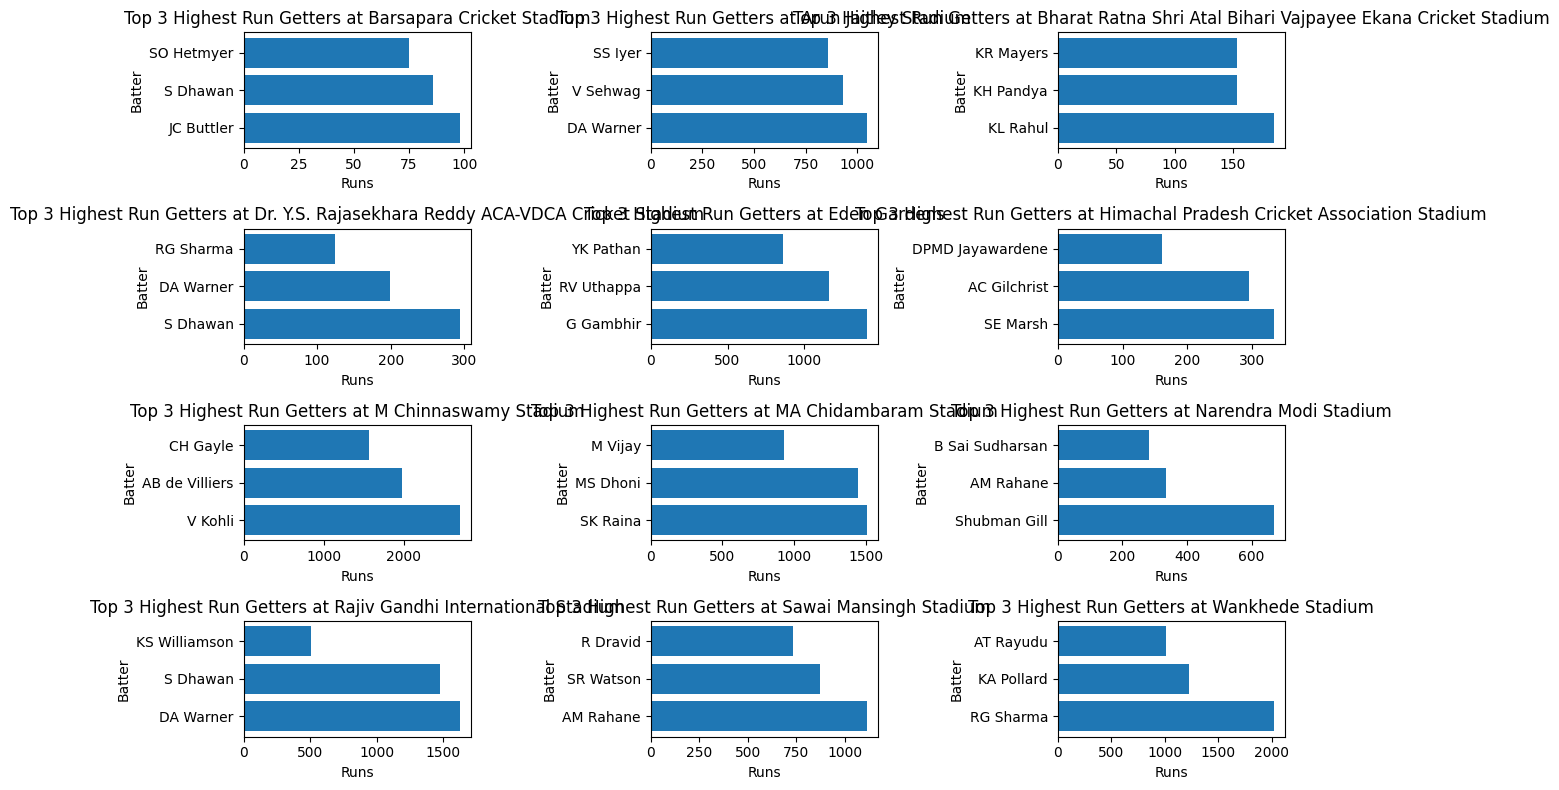

In [170]:

deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')
merged_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
venues_of_interest = [
    'Barsapara Cricket Stadium',
    'Arun Jaitley Stadium',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Eden Gardens',
    'Himachal Pradesh Cricket Association Stadium',
    'M Chinnaswamy Stadium',
    'MA Chidambaram Stadium',
    'Narendra Modi Stadium',
    'Rajiv Gandhi International Stadium',
    'Sawai Mansingh Stadium',
    'Wankhede Stadium'
]
filtered_data = merged_data[merged_data['venue'].isin(venues_of_interest)]
venue_player_runs = filtered_data.groupby(['venue', 'batter'])['batsman_runs'].sum().reset_index()
venue_player_runs_sorted = venue_player_runs.groupby('venue', group_keys=False).apply(lambda x: x.nlargest(3, 'batsman_runs')).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for i, venue in enumerate(venues_of_interest, start=1):
    plt.subplot(4, 3, i)
    venue_top_players = venue_player_runs_sorted[venue_player_runs_sorted['venue'] == venue]
    plt.barh(venue_top_players['batter'], venue_top_players['batsman_runs'])
    plt.xlabel('Runs')
    plt.ylabel('Batter')
    plt.title(f'Top 3 Highest Run Getters at {venue}')

plt.tight_layout()
plt.show()


---------------------------------------------
This script filters data for wickets taken by bowlers, groups the data by venue and bowler to count the wickets, selects the top 3 wicket-takers for each venue, and plots bar charts for each venue showing the top 3 wicket-takers.

Steps:
1. Filter data for wickets taken by bowlers (dismissal kinds: 'bowled', 'caught', 'caught and bowled', 'lbw', 'hit wicket').
2. Group the filtered data by venue and bowler to count the wickets taken.
3. Select the top 3 wicket-takers for each venue.
4. Plot bar charts for each venue showing the top 3 wicket-takers.


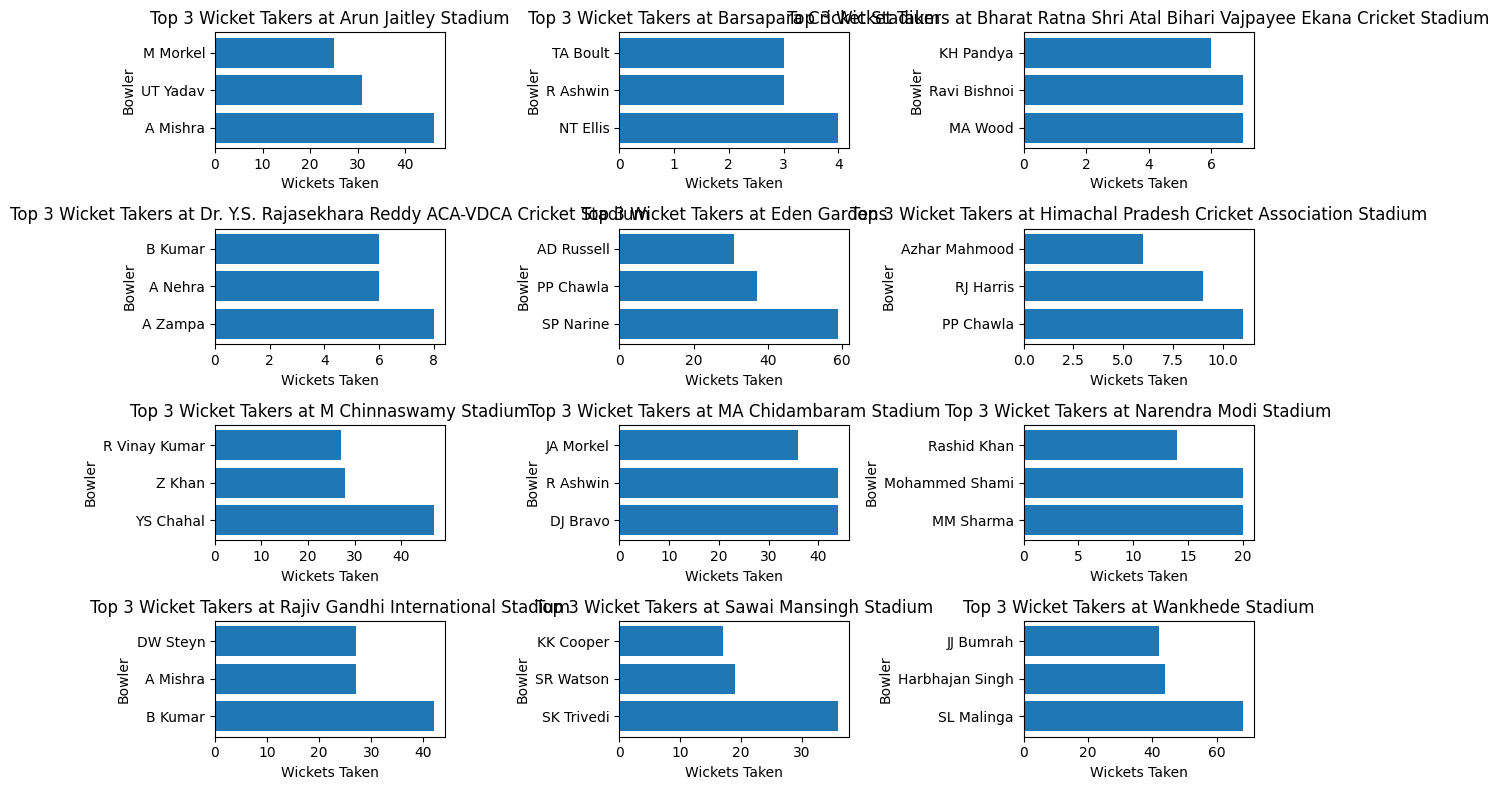

In [171]:
wickets_data = filtered_data[filtered_data['dismissal_kind'].isin(['bowled', 'caught', 'caught and bowled', 'lbw', 'hit wicket'])]
venue_bowler_wickets = wickets_data.groupby(['venue', 'bowler'])['dismissal_kind'].count().reset_index()
venue_bowler_wickets_sorted = venue_bowler_wickets.groupby('venue', group_keys=False).apply(lambda x: x.nlargest(3, 'dismissal_kind')).reset_index(drop=True)
venues_of_interest = venue_bowler_wickets_sorted['venue'].unique()

plt.figure(figsize=(12, 8))

for i, venue in enumerate(venues_of_interest, start=1):
    plt.subplot(4, 3, i)
    venue_top_bowlers = venue_bowler_wickets_sorted[venue_bowler_wickets_sorted['venue'] == venue]
    plt.barh(venue_top_bowlers['bowler'], venue_top_bowlers['dismissal_kind'])
    plt.xlabel('Wickets Taken')
    plt.ylabel('Bowler')
    plt.title(f'Top 3 Wicket Takers at {venue}')

plt.tight_layout()
plt.show()


---------------------------------------------
This script filters data to find instances where Virat Kohli was dismissed by Jasprit Bumrah, resets the index of the filtered data, and prints specific columns ('season', 'inning', 'over', 'ball', 'dismissal_kind', 'venue') of the filtered data.

Steps:
1. Filter data to find instances where Virat Kohli was dismissed by Jasprit Bumrah.
2. Reset the index of the filtered data for clarity.
3. Print specific columns of the filtered data ('season', 'inning', 'over', 'ball', 'dismissal_kind', 'venue').


In [172]:
virat_out_to_bumrah = merged_data[(merged_data['batter'] == 'V Kohli') & (merged_data['bowler'] == 'JJ Bumrah') & (merged_data['player_dismissed'] == 'V Kohli')]
virat_out_to_bumrah.reset_index(drop=True, inplace=True)
selected_columns = ['season', 'inning', 'over', 'ball', 'dismissal_kind', 'venue']
virat_out_to_bumrah['Sno'] = range(1, len(virat_out_to_bumrah) + 1)
selected_columns.insert(0, 'Sno')

print("Virat Kohli's Dismissals to Jasprit Bumrah:")
print(tabulate(virat_out_to_bumrah[selected_columns], headers='keys', tablefmt='grid', showindex=False))


Virat Kohli's Dismissals to Jasprit Bumrah:
+-------+----------+----------+--------+--------+------------------+------------------------+
|   Sno | season   |   inning |   over |   ball | dismissal_kind   | venue                  |
+=======+==========+==========+========+========+==================+========================+
|     1 | 2013     |        1 |      4 |      5 | lbw              | M Chinnaswamy Stadium  |
+-------+----------+----------+--------+--------+------------------+------------------------+
|     2 | 2019     |        2 |     13 |      4 | caught           | M Chinnaswamy Stadium  |
+-------+----------+----------+--------+--------+------------------+------------------------+
|     3 | 2020/21  |        1 |     11 |      2 | caught           | Sheikh Zayed Stadium   |
+-------+----------+----------+--------+--------+------------------+------------------------+
|     4 | 2021     |        2 |     12 |      3 | lbw              | MA Chidambaram Stadium |
+-------+-------

<ipython-input-172-5557ff6d7918>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virat_out_to_bumrah['Sno'] = range(1, len(virat_out_to_bumrah) + 1)


---------------------------------------------
This script filters merged data for specific cricket venues of interest, extracts first innings data, calculates the total runs scored in the first innings for each match at each venue, calculates the average first innings total runs for each venue, rounds the average to the nearest whole number, and prints the average first innings total runs for each venue.

Steps:
1. Filter merged data for specific cricket venues of interest.
2. Extract first innings data.
3. Group first innings data by venue and match ID to calculate total runs scored in the first innings for each match at each venue.
4. Group total runs by venue to calculate the average first innings total runs for each venue.
5. Round the average first innings total runs to the nearest whole number.
6. Print the average first innings total runs for each venue.


In [173]:

filtered_data = merged_data[merged_data['venue'].isin(venues_of_interest)]
first_innings_data = filtered_data[filtered_data['inning'] == 1]
venue_first_innings_total = first_innings_data.groupby(['venue', 'match_id'])['total_runs'].sum().reset_index()
average_first_innings_total = venue_first_innings_total.groupby('venue')['total_runs'].mean().reset_index()
average_first_innings_total['total_runs'] = average_first_innings_total['total_runs'].round(0)
average_first_innings_total['Sno'] = range(1, len(average_first_innings_total) + 1)
average_first_innings_total = average_first_innings_total[['Sno', 'venue', 'total_runs']]
print("Average First Innings Total Runs by Venue:")
print(tabulate(average_first_innings_total, headers='keys', tablefmt='grid', showindex=False))



Average First Innings Total Runs by Venue:
+-------+--------------------------------------------------------------+--------------+
|   Sno | venue                                                        |   total_runs |
+=======+==============================================================+==============+
|     1 | Arun Jaitley Stadium                                         |          165 |
+-------+--------------------------------------------------------------+--------------+
|     2 | Barsapara Cricket Stadium                                    |          198 |
+-------+--------------------------------------------------------------+--------------+
|     3 | Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium |          148 |
+-------+--------------------------------------------------------------+--------------+
|     4 | Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium          |          157 |
+-------+--------------------------------------------------------------+-----

---------------------------------------------
This script  calculates and displays the top 10 highest scorers of the overall tournament using the deliveries.csv dataset.

It performs the following steps:
1. Loads the deliveries.csv dataset.
2. Groups the data by batsman and calculates the total runs scored by each batsman.
3. Sorts the batsmen based on their total runs in descending order.
4. Creates a table with the top 10 highest scorers, starting numbering from 1.
5. Displays the table using the tabulate library in a grid format.



In [174]:
batsman_runs = deliveries_df.groupby('batter')['batsman_runs'].sum()
top_scorers = batsman_runs.sort_values(ascending=False).head(10)
top_scorers_df = top_scorers.reset_index().rename(columns={'batter': 'Batsman', 'batsman_runs': 'Total Runs'})
top_scorers_df.index += 1
print("Top 10 Highest Scorers of the Overall Tournament:")
print(tabulate(top_scorers_df, headers='keys', showindex=True, tablefmt='grid'))


Top 10 Highest Scorers of the Overall Tournament:
+----+----------------+--------------+
|    | Batsman        |   Total Runs |
+====+================+==============+
|  1 | V Kohli        |         7273 |
+----+----------------+--------------+
|  2 | S Dhawan       |         6617 |
+----+----------------+--------------+
|  3 | DA Warner      |         6399 |
+----+----------------+--------------+
|  4 | RG Sharma      |         6213 |
+----+----------------+--------------+
|  5 | SK Raina       |         5536 |
+----+----------------+--------------+
|  6 | AB de Villiers |         5181 |
+----+----------------+--------------+
|  7 | MS Dhoni       |         5082 |
+----+----------------+--------------+
|  8 | CH Gayle       |         4997 |
+----+----------------+--------------+
|  9 | RV Uthappa     |         4954 |
+----+----------------+--------------+
| 10 | KD Karthik     |         4517 |
+----+----------------+--------------+


---------------------------------------------
This script concatenates the 'batter' and 'bowler' columns from the merged data to get a list of all players who have played in the IPL so far, calculates the total number of unique players, and prints the total number of players who have played in the IPL.

Steps:
1. Concatenate the 'batter' and 'bowler' columns from the merged data to get a list of all players who have played in the IPL.
2. Get the unique players from the concatenated list to eliminate duplicates and calculate the total number of unique players.
3. Print the total number of players who have played in the IPL so far.


In [175]:
all_players = pd.concat([merged_df['batter'], merged_df['bowler']]).unique()
total_players = len(all_players)
print("Total number of players who have played in the IPL so far:", total_players)


Total number of players who have played in the IPL so far: 209


---------------------------------------------
This script filters the merged data for wickets taken by bowlers in innings 1 and 2, groups the data by season and bowler to count the wickets, selects the highest wicket-taker for each season, resets the index for clarity, and prints the purple cap holders of each season.

Steps:
1. Filter merged data for wickets taken by bowlers (dismissal kinds: 'caught', 'bowled', 'caught and bowled', 'stumped', 'hit wicket', 'lbw') in innings 1 and 2.
2. Group the filtered data by season and bowler to count the wickets taken.
3. Select the highest wicket-taker for each season.
4. Reset the index of the highest wicket-takers for clarity.
5. Print the purple cap holders of each season.


In [176]:
wickets_df = merged_df[(merged_df['dismissal_kind'].isin(['caught', 'bowled', 'caught and bowled', 'stumped', 'hit wicket', 'lbw'])) & (merged_df['inning'].isin([1, 2]))]
season_wickets = wickets_df.groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()
highest_wickets = season_wickets.loc[season_wickets.groupby('season')['dismissal_kind'].idxmax()]
highest_wickets.reset_index(drop=True, inplace=True)
table_data = highest_wickets[['season', 'bowler', 'dismissal_kind']].reset_index(drop=True)
table_data.insert(0, 'No.', table_data.index + 1)
headers = ['No.', 'Season', 'Bowler', 'Wickets']
print("Purple cap holders of each season")
print(tabulate(table_data, headers=headers, tablefmt='pretty', showindex=False, numalign='left'))


Purple cap holders of each season
+-----+--------+----------------+---------+
| No. | Season |     Bowler     | Wickets |
+-----+--------+----------------+---------+
|  1  |  2023  | Mohammed Shami |   28    |
+-----+--------+----------------+---------+


---------------------------------------------
This script filters the merged data for runs scored by batters in innings 1 and 2, groups the data by season, batter, and batting team to sum the runs, selects the highest run-getter for each season, resets the index for clarity, and prints the highest run-getters of each season.

Steps:
1. Filter merged data for runs scored by batters in innings 1 and 2.
2. Group the filtered data by season, batter, and batting team to sum the runs scored.
3. Select the highest run-getter for each season.
4. Reset the index of the highest run-getters for clarity.
5. Print the highest run-getters of each season.


In [177]:

runs_df = merged_df[(merged_df['inning'].isin([1, 2]))]
season_runs = runs_df.groupby(['season', 'batter', 'batting_team'])['batsman_runs'].sum().reset_index()
highest_rungetters = season_runs.loc[season_runs.groupby('season')['batsman_runs'].idxmax()]
highest_rungetters.reset_index(drop=True, inplace=True)
table_data = highest_rungetters[['season', 'batter', 'batting_team', 'batsman_runs']].reset_index(drop=True)
table_data.insert(0, 'No.', table_data.index + 1)
headers = ['No.', 'Season', 'Batter', 'Batting Team', 'Runs']
print("Highest run-getters of each season:")
print(tabulate(table_data, headers=headers, tablefmt='pretty', showindex=False, numalign='left'))


Highest run-getters of each season:
+-----+--------+--------------+----------------+------+
| No. | Season |    Batter    |  Batting Team  | Runs |
+-----+--------+--------------+----------------+------+
|  1  |  2023  | Shubman Gill | Gujarat Titans | 890  |
+-----+--------+--------------+----------------+------+


---------------------------------------------
This script filters the merged data for boundaries (fours and sixes) scored by batters in innings 1 and 2, counts the number of boundaries for each player, selects the top 10 players with the most sixes and fours, resets the index and renames columns for clarity, and prints the top players with the most sixes and fours in innings 1 or 2.

Steps:
1. Filter merged data for boundaries (fours and sixes) scored by batters in innings 1 and 2.
2. Group the filtered data by batter and count the number of boundaries (fours and sixes).
3. Select the top 10 players with the most sixes and fours.
4. Reset the index and rename columns for clarity.
5. Print the top 10 players with the most sixes and fours in innings 1 or 2.


In [178]:
boundaries_df = merged_df[((merged_df['batsman_runs'] == 4) | (merged_df['batsman_runs'] == 6)) & (merged_df['inning'].isin([1, 2]))]
boundary_counts = boundaries_df.groupby(['batter', 'batsman_runs']).size().unstack(fill_value=0)
top_six_hitters = boundary_counts[6].nlargest(10).reset_index()
top_six_hitters.columns = ['Player', 'Sixes']
top_four_hitters = boundary_counts[4].nlargest(10).reset_index()
top_four_hitters.columns = ['Player', 'Fours']
print("Top 10 players with the most sixes in innings 1 or 2:")
print(tabulate(top_six_hitters.reset_index(drop=True), headers=['No.', 'Player', 'Sixes'], tablefmt='pretty', showindex=True, numalign='left'))
print("\nTop 10 players with the most fours in innings 1 or 2:")
print(tabulate(top_four_hitters.reset_index(drop=True), headers=['No.', 'Player', 'Fours'], tablefmt='pretty', showindex=True, numalign='left'))


Top 10 players with the most sixes in innings 1 or 2:
+-----+--------------+-------+
| No. |    Player    | Sixes |
+-----+--------------+-------+
|  0  | F du Plessis |  36   |
|  1  |    S Dube    |  35   |
|  2  | Shubman Gill |  33   |
|  3  |  GJ Maxwell  |  31   |
|  4  |  RD Gaikwad  |  30   |
|  5  |   RK Singh   |  29   |
|  6  |   SA Yadav   |  28   |
|  7  |  MP Stoinis  |  27   |
|  8  |   N Pooran   |  26   |
|  9  | YBK Jaiswal  |  26   |
+-----+--------------+-------+

Top 10 players with the most fours in innings 1 or 2:
+-----+--------------+-------+
| No. |    Player    | Fours |
+-----+--------------+-------+
|  0  | Shubman Gill |  85   |
|  1  | YBK Jaiswal  |  83   |
|  2  |  DP Conway   |  77   |
|  3  |  DA Warner   |  69   |
|  4  |   SA Yadav   |  65   |
|  5  |   V Kohli    |  65   |
|  6  | F du Plessis |  60   |
|  7  | Ishan Kishan |  54   |
|  8  |   S Dhawan   |  49   |
|  9  |   WP Saha    |  47   |
+-----+--------------+-------+


---------------------------------------------
This script calculates the number of matches played by each player, selects players with at least 40 matches played, calculates player stats including total runs scored and balls faced, computes the strike rate for each player, selects the top 10 players with the best strike rates (min. 40 matches played), resets the index for clarity, and prints the top players with the best strike rates.

Steps:
1. Group merged data by batter and count the number of unique match IDs to calculate matches played by each player.
2. Select players with at least 40 matches played.
3. Group merged data by batter and aggregate batsman_runs (total runs scored) and ball (count of balls faced) to calculate player stats.
4. Merge players with at least 40 matches played and player stats on batter, inner join.
5. Calculate strike rate for each player as (batsman_runs / ball) * 100.
6. Select the top 10 players with the best strike rates (min. 40 matches played).
7. Reset the index of top players for clarity.
8. Print the top players with the best strike rates.


In [179]:
matches_played = merged_df.groupby('batter')['id'].nunique()
players_40_matches = matches_played[matches_played >= 40].reset_index()
player_stats = merged_df.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()
players_40_stats = pd.merge(players_40_matches, player_stats, on='batter', how='inner')
players_40_stats['strike_rate'] = (players_40_stats['batsman_runs'] / players_40_stats['ball']) * 100
top_players_strike_rate = players_40_stats.nlargest(10, 'strike_rate')

table_data = top_players_strike_rate[['batter', 'strike_rate']].reset_index(drop=True)
table_data.insert(0, 'No.', table_data.index + 1)
table_data['strike_rate'] = table_data['strike_rate'].apply(lambda x: "{:.2f}".format(x))  # Format strike rate to two decimal points
headers = ['No.', 'Player', 'Strike Rate']
print("Top 10 players with the best strike rates (min. 40 matches played):")
print(tabulate(table_data, headers=headers, tablefmt='pretty', showindex=False, numalign='left'))


Top 10 players with the best strike rates (min. 40 matches played):
+-----+--------+-------------+
| No. | Player | Strike Rate |
+-----+--------+-------------+
+-----+--------+-------------+


---------------------------------------------
This script calculates player stats including total runs scored and times out (wickets taken), computes batting average as runs divided by times out, filters players with at least 40 matches played, calculates average runs per match for each player, selects the top 10 players with the best average runs per match (min. 40 matches played), resets the index for clarity, and prints the top players with the best average runs per match.

Steps:
1. Group merged data by batter and aggregate batsman_runs (total runs scored) and is_wicket (times out, wickets taken) to calculate player stats.
2. Rename the 'is_wicket' column to 'times_out' for clarity.
3. Calculate batting average for each player as (batsman_runs / times_out).
4. Drop rows with NaN values if any.
5. Group merged data by batter and count the number of unique match IDs to calculate matches played by each player.
6. Select players with at least 40 matches played.
7. Merge players with at least 40 matches played and player stats on batter, inner join.
8. Calculate average runs per match for each player as (batsman_runs / matches played).
9. Select the top 10 players with the best average runs per match (min. 40 matches played).
10. Reset the index of top players for clarity.
11. Print the top players with the best average runs per match.


In [180]:
player_stats = merged_df.groupby('batter').agg({'batsman_runs': 'sum', 'is_wicket': 'sum'}).reset_index()
player_stats.rename(columns={'is_wicket': 'times_out'}, inplace=True)
player_stats['batting_average'] = player_stats['batsman_runs'] / player_stats['times_out']
player_stats.dropna(inplace=True)
matches_played = merged_df.groupby('batter')['id'].nunique()
players_40_matches = matches_played[matches_played >= 40].reset_index()
players_40_stats = pd.merge(players_40_matches, player_stats, on='batter', how='inner')
players_40_stats['average_runs_per_match'] = round(players_40_stats['batsman_runs'] / players_40_stats['id'], 2)

top_10_average_runs = players_40_stats.nlargest(10, 'average_runs_per_match')

table_data = top_10_average_runs[['batter', 'average_runs_per_match']].reset_index(drop=True)
table_data.insert(0, 'No.', table_data.index + 1)
headers = ['No.', 'Batter', 'Average Runs Per Match']
print("Top 10 players with the best average runs per match (min. 40 matches played):")
print(tabulate(table_data, headers=headers, tablefmt='pretty', showindex=False, numalign='left'))


Top 10 players with the best average runs per match (min. 40 matches played):
+-----+--------+------------------------+
| No. | Batter | Average Runs Per Match |
+-----+--------+------------------------+
+-----+--------+------------------------+


---------------------------------------------
This script calculates statistics related to bowled dismissals for both bowlers and batters. It calculates the number of bowled wickets taken by each bowler and selects the top 10 bowlers with the most bowled wickets. It also calculates the number of times each batter has been dismissed by getting bowled and selects the top 10 batters who have been dismissed by getting bowled the most times.

Steps:
1. Filter deliveries data for bowled dismissals to calculate bowled wickets taken by each bowler.
2. Group bowled wickets data by bowler and count the number of bowled dismissals for each bowler.
3. Rename the 'dismissal_kind' column to 'bowled_wickets' for clarity.
4. Select the top 10 bowlers with the most bowled wickets.
5. Print the top bowlers with the most bowled wickets.
6. Filter deliveries data for bowled dismissals to calculate bowled dismissals for each batter.
7. Group bowled dismissals data by batter and count the number of bowled dismissals for each batter.
8. Rename the 'dismissal_kind' column to 'bowled_dismissals' for clarity.
9. Select the top 10 batters who have been dismissed by getting bowled the most times.
10. Print the top 10 batters who have been dismissed by getting bowled the most times.


In [181]:
bowled_wickets = deliveries_df[deliveries_df['dismissal_kind'] == 'bowled']
bowler_bowled_wickets = bowled_wickets.groupby('bowler')['dismissal_kind'].count().reset_index()
bowler_bowled_wickets.rename(columns={'dismissal_kind': 'bowled_wickets'}, inplace=True)
top_bowlers_bowled_wickets = bowler_bowled_wickets.nlargest(10, 'bowled_wickets')
table_data1 = top_bowlers_bowled_wickets.reset_index(drop=True)
table_data1.insert(0, 'No.', table_data1.index + 1)
headers1 = ['No.', 'Bowler', 'Bowled Wickets']
print("Top bowlers with the most bowled wickets:")
print(tabulate(table_data1, headers=headers1, tablefmt='pretty', showindex=False, numalign='left'))

bowled_dismissals = deliveries_df[deliveries_df['dismissal_kind'] == 'bowled']
batter_bowled_dismissals = bowled_dismissals.groupby('batter')['dismissal_kind'].count().reset_index()
batter_bowled_dismissals.rename(columns={'dismissal_kind': 'bowled_dismissals'}, inplace=True)

top_10_batters_bowled_dismissals = batter_bowled_dismissals.nlargest(10, 'bowled_dismissals')
table_data2 = top_10_batters_bowled_dismissals.reset_index(drop=True)
table_data2.insert(0, 'No.', table_data2.index + 1)
headers2 = ['No.', 'Batter', 'Bowled Dismissals']
print("Top 10 batters who have been dismissed by getting bowled the most times:")
print(tabulate(table_data2, headers=headers2, tablefmt='pretty', showindex=False, numalign='left'))


Top bowlers with the most bowled wickets:
+-----+----------------+----------------+
| No. |     Bowler     | Bowled Wickets |
+-----+----------------+----------------+
|  1  |   SL Malinga   |       63       |
|  2  |   PP Chawla    |       48       |
|  3  |   SP Narine    |       46       |
|  4  |   RA Jadeja    |       39       |
|  5  |    B Kumar     |       38       |
|  6  |  Rashid Khan   |       36       |
|  7  |   YS Chahal    |       35       |
|  8  |   JJ Bumrah    |       33       |
|  9  |    AR Patel    |       30       |
| 10  | Mohammed Shami |       30       |
+-----+----------------+----------------+
Top 10 batters who have been dismissed by getting bowled the most times:
+-----+------------+-------------------+
| No. |   Batter   | Bowled Dismissals |
+-----+------------+-------------------+
|  1  |  S Dhawan  |        38         |
|  2  |  V Kohli   |        38         |
|  3  | SR Watson  |        36         |
|  4  | MK Pandey  |        30         |
|  5  | AT

---------------------------------------------
This script calculates statistics related to catches taken by fielders. It filters deliveries data for catches, groups the data by fielder, counts the number of catches taken by each fielder, selects the top 10 players who have taken the most catches, and prints the top 10 fielders with the most catches.

Steps:
1. Filter deliveries data for catches to calculate catches taken by each fielder.
2. Group catches data by fielder and count the number of catches for each fielder.
3. Rename the 'dismissal_kind' column to 'catches' for clarity.
4. Select the top 10 fielders who have taken the most catches.
5. Print the top 10 fielders with the most catches.


In [182]:

catches = deliveries_df[deliveries_df['dismissal_kind'] == 'caught']
fielder_catches = catches.groupby('fielder')['dismissal_kind'].count().reset_index()
fielder_catches.rename(columns={'dismissal_kind': 'catches'}, inplace=True)
top_10_fielders_catches = fielder_catches.nlargest(10, 'catches')
table_data = top_10_fielders_catches.reset_index(drop=True)
table_data.insert(0, 'No.', table_data.index + 1)
headers = ['No.', 'Fielder', 'Catches']
print("Top 10 players who have taken the most catches:")
print(tabulate(table_data[['fielder', 'catches']], headers=headers, tablefmt='pretty', showindex=False, numalign='left'))


Top 10 players who have taken the most catches:
+----------------+---------+
|      No.       | Fielder |
+----------------+---------+
|    MS Dhoni    |   142   |
|   KD Karthik   |   141   |
| AB de Villiers |   120   |
|    SK Raina    |   106   |
|    V Kohli     |   106   |
|   KA Pollard   |   97    |
|   RG Sharma    |   97    |
|    S Dhawan    |   97    |
|   RV Uthappa   |   92    |
|   RA Jadeja    |   91    |
+----------------+---------+


---------------------------------------------
This script calculates statistics related to bowler-fielder combinations in taking catches. It filters deliveries data for catches, groups the data by both bowler and fielder, counts the number of wickets taken by each bowler-fielder combo, selects the top 10 bowler-fielder combos with the most wickets taken together, and prints the top 10 bowler-fielder combos.

Steps:
1. Filter deliveries data for catches to calculate catches taken by each bowler-fielder combination.
2. Group catches data by both bowler and fielder, and count the number of catches (wickets) for each combo.
3. Rename the size column to 'wickets' for clarity.
4. Select the top 10 bowler-fielder combos with the most wickets taken together.
5. Print the top 10 bowler-fielder combos with the most wickets.


In [183]:
caught_wickets = deliveries_df[deliveries_df['dismissal_kind'] == 'caught']
bowler_fielder_combos = caught_wickets.groupby(['bowler', 'fielder']).size().reset_index(name='wickets')
top_combos = bowler_fielder_combos.nlargest(10, 'wickets')
table_data = top_combos[['bowler', 'fielder', 'wickets']].reset_index(drop=True)
table_data.insert(0, 'No.', table_data.index + 1)
headers = ['No.', 'Bowler', 'Fielder', 'Wickets']
print("Top 10 bowler-fielder combos with the most wickets taken together:")
print(tabulate(table_data, headers=headers, tablefmt='pretty', showindex=False, numalign='left'))


Top 10 bowler-fielder combos with the most wickets taken together:
+-----+-----------------+------------+---------+
| No. |     Bowler      |  Fielder   | Wickets |
+-----+-----------------+------------+---------+
|  1  |    DJ Bravo     | RA Jadeja  |   20    |
|  2  |    K Rabada     |  RR Pant   |   20    |
|  3  |    DJ Bravo     |  MS Dhoni  |   18    |
|  4  |    DJ Bravo     |  SK Raina  |   18    |
|  5  | Harbhajan Singh | KA Pollard |   16    |
|  6  |    HV Patel     | KD Karthik |   13    |
|  7  |    JJ Bumrah    | Q de Kock  |   13    |
|  8  |   SL Malinga    | KA Pollard |   13    |
|  9  |    SN Thakur    |  MS Dhoni  |   13    |
| 10  | Sandeep Sharma  |  WP Saha   |   13    |
+-----+-----------------+------------+---------+


---------------------------------------------
This script calculates statistics related to bowler-wicketkeeper combinations in taking stumped wickets. It filters deliveries data for stumped dismissals, groups the data by both bowler and wicketkeeper (fielder), counts the number of stumped wickets taken by each bowler-wicketkeeper combo, selects the top 10 bowler-wicketkeeper combos with the most stumped wickets taken together, and prints the top 10 bowler-wicketkeeper combos.

Steps:
1. Filter deliveries data for stumped dismissals to calculate stumped wickets taken by each bowler-wicketkeeper combination.
2. Group stumped wickets data by both bowler and wicketkeeper (fielder), and count the number of stumped wickets for each combo.
3. Rename the size column to 'stumped_wickets' for clarity.
4. Select the top 10 bowler-wicketkeeper combos with the most stumped wickets taken together.
5. Print the top 10 bowler-wicketkeeper combos with the most stumped wickets.


In [184]:
stumped_wickets = deliveries_df[deliveries_df['dismissal_kind'] == 'stumped']
bowler_fielder_combos_stumped = stumped_wickets.groupby(['bowler', 'fielder']).size().reset_index(name='stumped_wickets')
top_combos_stumped = bowler_fielder_combos_stumped.nlargest(10, 'stumped_wickets')
top_combos_stumped.reset_index(drop=True, inplace=True)
table_data = top_combos_stumped[['bowler', 'fielder', 'stumped_wickets']].reset_index(drop=True)
table_data.insert(0, 'No.', table_data.index + 1)
headers = ['No.', 'Bowler', 'Fielder', 'Stumped Wickets']
print("Top 10 bowler-Wicketkeeper combos with the most stumped wickets taken together:")
print(tabulate(table_data, headers=headers, tablefmt='pretty', showindex=False, numalign='left'))


Top 10 bowler-Wicketkeeper combos with the most stumped wickets taken together:
+-----+---------------+--------------+-----------------+
| No. |    Bowler     |   Fielder    | Stumped Wickets |
+-----+---------------+--------------+-----------------+
|  1  |   A Mishra    |  KD Karthik  |        9        |
|  2  |    PP Ojha    | AC Gilchrist |        9        |
|  3  |   R Ashwin    |   MS Dhoni   |        8        |
|  4  |   RA Jadeja   |   MS Dhoni   |        8        |
|  5  |   A Mishra    |   RR Pant    |        7        |
|  6  |   AR Patel    |   WP Saha    |        7        |
|  7  |   RD Chahar   |  Q de Kock   |        7        |
|  8  |   SB Jakati   |   MS Dhoni   |        6        |
|  9  | Kuldeep Yadav |  RV Uthappa  |        5        |
| 10  |   R Tewatia   |  SV Samson   |        5        |
+-----+---------------+--------------+-----------------+


---------------------------------------------
This script calculates statistics related to dot balls and sixes conceded by bowlers. It filters merged data for innings 1 and 2, excludes innings 3 and 4, then calculates the number of dot balls and sixes conceded by each bowler. It selects the top 10 bowlers with the most dot balls and the top 10 bowlers who conceded the most sixes and prints the results.

Steps:
1. Filter merged data for innings 1 and 2 (excluding innings 3 and 4).
2. Calculate dot balls by filtering for rows where total runs are 0.
3. Count the number of dot balls for each bowler and select the top 10 bowlers with the most dot balls.
4. Print the top 10 bowlers with the most dot balls.
5. Calculate sixes conceded by filtering for rows where total runs are 6.
6. Count the number of sixes conceded for each bowler and select the top 10 bowlers who conceded the most sixes.
7. Print the top 10 bowlers who conceded the most sixes.


In [185]:

filtered_df = merged_df[~merged_df['inning'].isin([3, 4])]
dot_balls_df = filtered_df[filtered_df['total_runs'] == 0]
dot_balls_count = dot_balls_df['bowler'].value_counts().head(10)

sixes_df = filtered_df[filtered_df['total_runs'] == 6]
sixes_count = sixes_df['bowler'].value_counts().head(10)

print("Top 10 Bowlers with Most Dot Balls:")
dot_balls_table = pd.DataFrame(dot_balls_count.reset_index())
dot_balls_table.columns = ['Bowler', 'Dot Balls']
print(tabulate(dot_balls_table, headers='keys', tablefmt='grid'))

print("\nTop 10 Bowlers who Conceded Most Sixes:")
sixes_table = pd.DataFrame(sixes_count.reset_index())
sixes_table.columns = ['Bowler', 'Sixes Conceded']
print(tabulate(sixes_table, headers='keys', tablefmt='grid'))


Top 10 Bowlers with Most Dot Balls:
+----+----------------+-------------+
|    | Bowler         |   Dot Balls |
+====+================+=============+
|  0 | Mohammed Shami |         184 |
+----+----------------+-------------+
|  1 | Mohammed Siraj |         151 |
+----+----------------+-------------+
|  2 | Rashid Khan    |         129 |
+----+----------------+-------------+
|  3 | TU Deshpande   |         128 |
+----+----------------+-------------+
|  4 | B Kumar        |         121 |
+----+----------------+-------------+
|  5 | PP Chawla      |         120 |
+----+----------------+-------------+
|  6 | CV Varun       |         115 |
+----+----------------+-------------+
|  7 | Arshdeep Singh |         110 |
+----+----------------+-------------+
|  8 | RA Jadeja      |         106 |
+----+----------------+-------------+
|  9 | TA Boult       |         103 |
+----+----------------+-------------+

Top 10 Bowlers who Conceded Most Sixes:
+----+----------------+------------------+
|    |